In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [2]:
gdp_df = pd.read_csv(r"..\data\gdp_per_capita.csv", skipfooter=2,)

<ipython-input-2-0fb69e00df2c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv(r"..\data\gdp_per_capita.csv", skipfooter=2,)


In [3]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [4]:
del gdp_df['Value Footnotes']

In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [7]:
gdp_df['Year'].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [8]:
gdp_df['Country'].value_counts()

Grenada                      29
Sri Lanka                    29
St. Lucia                    29
Bangladesh                   29
Thailand                     29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

243, See cell above, newer countries and new to reporting GDP

Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [9]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

Use .describe() to find the summary statistics for GDP per capita in 2014.

In [10]:
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64

Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

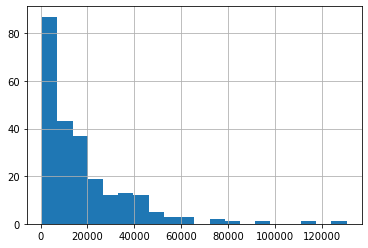

In [11]:
gdp_2014['GDP_Per_Capita'].hist(bins=20)

Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [12]:
 gdp_2014.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [13]:
gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2017]].dropna()

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [14]:
gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda x: (100*(x[2017]-x[1990]))/x[1990], axis=1)

In [15]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [16]:
len(gdp_pivoted[gdp_pivoted['Percent_Change'] < 0])

20

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
**Bonus**: Put both line charts on the same plot.

In [17]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False).head(2)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241


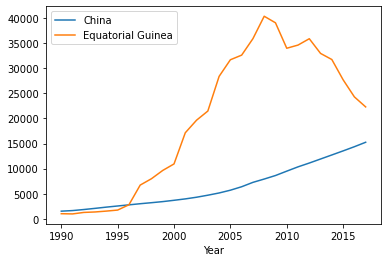

In [20]:
fig, ax = plt.subplots()

for key, grp in gdp_df[(gdp_df['Country'].isin(['Equatorial Guinea','China'])) & (gdp_df['Year'].between(1990,2017, inclusive=True))].sort_values(['Country','Year']).groupby('Country'):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='GDP_Per_Capita', label=key)

plt.legend(loc='best')
plt.show()

Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [ ]:
continents = pd.read_csv(r"..\data\continents.csv")

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [ ]:
gdp_df = gdp_df.merge(continents)

Determine the number of countries per continent. Create a bar chart showing this.

In [ ]:
gdp_df[['Country', 'Continent']].groupby('Continent')['Country'].nunique().plot(kind='bar')

Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [ ]:
sns.boxplot(x="Continent",  
            y="GDP_Per_Capita",  
            data = gdp_df[gdp_df['Year']==2014])  

Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [ ]:
internet_df = pd.read_csv(r"..\data\internet_use.csv", error_bad_lines=False, warn_bad_lines=True, nrows=4495)

In [ ]:
internet_df

Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [ ]:
del internet_df['Value Footnotes']

In [ ]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [ ]:
internet_df.info()

What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [ ]:
internet_df[internet_df['Internet_Users_Pct']> 0].sort_values('Year')

In [ ]:
internet_df[['Year', 'Internet_Users_Pct']].groupby('Year').sum()

In [ ]:
internet_df[['Year', 'Internet_Users_Pct']].groupby('Year').sum().plot(kind="line")

Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.
**Difficult Bonus**: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [ ]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'])

Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [ ]:
gdp_and_internet_use.head()

Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [ ]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these 3 countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [ ]:
top_3_gdp_2014 = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False)[:3]['Country'].to_list()

In [ ]:
top_3_gdp_2014_internet_use = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_3_gdp_2014)].sort_values(['Country', 'Year'])

In [ ]:
fg = sns.FacetGrid(top_3_gdp_2014_internet_use, col="Country", )
fg.map(plt.bar, "Year", "Internet_Users_Pct").add_legend()

Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

In [ ]:
gdp_and_internet_use_2014.plot(kind="scatter", x="Internet_Users_Pct", y='GDP_Per_Capita')

Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [ ]:
gdp_and_internet_use_2014.corr().loc['GDP_Per_Capita', 'Internet_Users_Pct']

Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [ ]:
gdp_and_internet_use_2014['log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

In [ ]:
gdp_and_internet_use_2014.plot(kind='scatter', x="Internet_Users_Pct", y='log_GDP_Per_Capita')

In [ ]:
gdp_and_internet_use_2014.corr().loc['log_GDP_Per_Capita', 'Internet_Users_Pct']

Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [ ]:
gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States'].plot(kind='scatter', x="Internet_Users_Pct", y='GDP_Per_Capita')

In [ ]:
gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States'].corr().loc['GDP_Per_Capita', 'Internet_Users_Pct']